# Module 1c Review & Masking

****

### Headers and HTML in Markdown

# Module
## Module
### Module
#### Module

<ol>
<li>item one</li>
<li>item two</li>
</ol>

<img src="Graphics/face.png">

#### Review and Further Explanation

1) Markdown
2) Jupyter Notebook
3) Python List vs. NumPy Array
4) Review of image data formatting.
5) Color Spaces
6) Histograms

#### 1st Computer Vision Pipeline 

1) Take an image of your face.
2) Import the image into a Jupyter notebook and draw the image.
3) Analyze the type, size, and array format.
4) Analyze the histogram for exposure.
5) Correct the exposure using brightness and contrast.
6) Monitor changes with histogram.
7) Convert the color space to HSV to separate brightness from chromaticity. 
8) Create a mask with the coordinates of your face.
9) Isolate the HSV ranges within the mask.
10) Segment those ranges!!! 



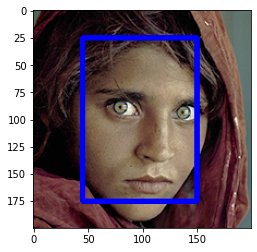

In [241]:
#Import Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Saving an image. 0 for grayscale. 1 for color. -1 for color with a alpha channel. 
img = cv2.imread('Graphics/face.png', 1)

# Tuple - can't be changed.
# Top Left corner of rectangle
top_left = (45, 25)
  
# Bottom right corner of rectangle
bottom_right = (150, 175)
  
# Blue color in RGB for rectangle.
rect_color = (255, 0, 0)
  
# Thickness of line 5 px
thickness = 3
  
# Add a rectangle to our image.
img_rect = cv2.rectangle(img, top_left, bottom_right, rect_color, thickness)

#OpenCV by defualt uses BGR instead of RGB.  BGR is an old digital camera standard which has to be convert to RGB. Convert it to Gray.  How to in the next chapter. 
img_rect = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


#Use matplotlib while using a python notebook
plt.imshow(img_rect)

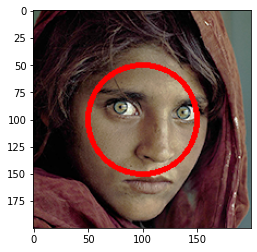

In [242]:
#Saving an image. 0 for grayscale. 1 for color. -1 for color with a alpha channel. 
img = cv2.imread('Graphics/face.png', 1)

# Red color in RGB for circle.
circle_color = (0, 0, 255)

# Circle of circle.
center_circle = (100,100)

# Radius of circle.
radius = 50

# Add a circle to our image.
img_circle = cv2.circle(img, center_circle, radius, circle_color, thickness)

#OpenCV by defualt uses BGR instead of RGB.  BGR is an old digital camera standard which has to be convert to RGB. Convert it to Gray.  How to in the next chapter. 
img_circle = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_circle)

(200, 200)


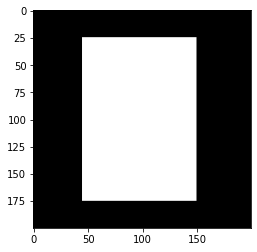

In [243]:
# create a mask
# The same shape as our image but remove the last dimension. 3-D -> 2-D
mask = np.zeros(img.shape[:2], np.uint8)

# Set the masked area to white. Opposite of rectangle.  Bottom right first, Top left second.
mask[25:175, 45:150] = 255
print(mask.shape)
plt.imshow(mask, cmap="gray")
# Calculate histogram with mask and without mask
# Check third argument for mask
# hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
# hist_mask = cv.calcHist([img],[0],mask,[256],[0,256])

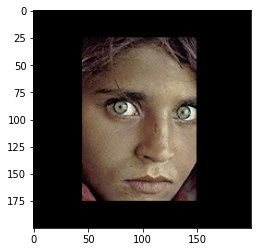

In [244]:
#Saving an image. 0 for grayscale. 1 for color. -1 for color with a alpha channel. 
img = cv2.imread('Graphics/face.png', 1)

# 
# The bitwise AND operator ( & ) compares each bit of the first operand to the corresponding bit of the second operand. 
# If both bits are 1, the corresponding result bit is set to 1. Otherwise, the corresponding result bit is set to 0. 
# First image to compare.  Second image to compare.  Mask to use. 
img_masked = cv2.bitwise_and(img, img, mask=mask)
img_masked = cv2.cvtColor(img_masked, cv2.COLOR_BGR2RGB)
plt.imshow(masked_img)

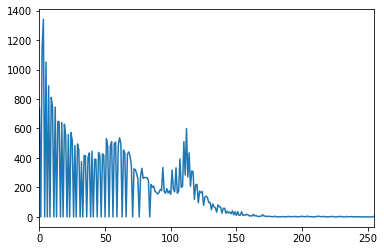

In [245]:
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])

# Plot the histogram
plt.plot(hist_full)
# Limit the range to 0, 255
plt.xlim([0,255])
# Show the plot
plt.show()

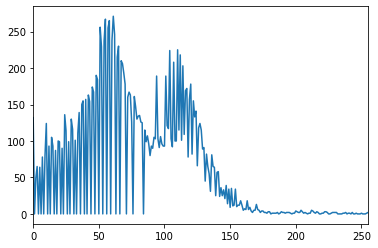

In [246]:
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

# Plot the histogram
plt.plot(hist_mask)
# Limit the range to 0, 255
plt.xlim([0,255])
# Show the plot
plt.show()

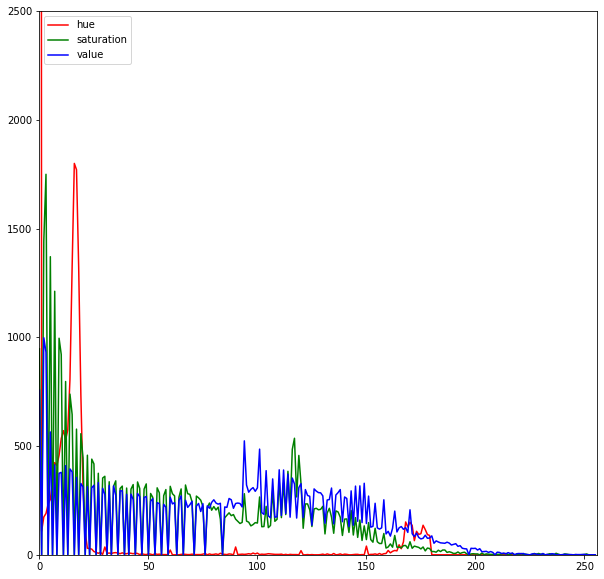

In [247]:
#Convert from RGB to HSV. 
img_masked = cv2.cvtColor(img_masked, cv2.COLOR_RGB2HSV)

# Let's make the plot larger. 
fig = plt.figure(figsize=(10,10))

# # First plot for the hue.
hist = cv2.calcHist([img_masked],[0],None,[256],[0,255])
plt.plot(hist, color='red')
plt.xlim([0,256])

# # Second plot for saturation.
hist = cv2.calcHist([img],[1],None,[256],[0,255])
plt.plot(hist, color='green')
plt.xlim([0,256])

# # Third plot for value. 
hist = cv2.calcHist([img],[2],None,[256],[0,255])
plt.plot(hist, color='blue')
plt.xlim([0,256])
plt.ylim([0,2500])
plt.legend(('hue','saturation', 'value'), loc = 'upper left')
plt.show()

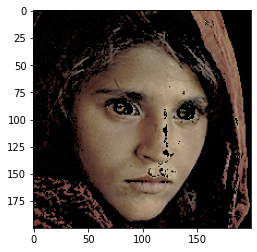

In [248]:
min_HSV = np.array([0, 0, 0], dtype = "uint8")
max_HSV = np.array([25, 170, 200], dtype = "uint8")
# Get pointer to video frames from primary device
image = cv2.imread('Graphics/face.png', 1)
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
# imageHSV = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
skinRegionHSV = cv2.inRange(image, min_HSV, max_HSV)

skinHSV = cv2.bitwise_and(image, image, mask = skinRegionHSV)
showImg = cv2.cvtColor(skinHSV, cv2.COLOR_HSV2RGB)
plt.imshow(showImg)